In [1]:
from pathlib import Path
import sys

parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

import numpy as np
import pandas as pd
from models.ensemble import TME_ensemble
from models.tme import deses                  
from models.tme import rmse, mae, mape, iw, nnll   
from data.preprocess import read_txn_data , preprocess_txn_data, compute_lob_features, \
    create_lob_dataset, merge_txn_and_lob
from models.deseasonalization import deses


In [3]:
cfg = {
    "data_split": {
        "train_size": 0.7,
        "validation_size": 0.1
    },
    "model_params": {
        "n_models": 10,
        "horizon": 100,
        "batch_size": 4096,
        "learning_rate": 0.001,
        "epochs": 10,
        "l2_lambda": 0.01  # L2 regularization strength
    }
}

# 1 min

trx Data loaded successfully.
preprocessed lob Data loaded successfully.

Training model 1/10
ep01  train 4.8633  val 4.5733
ep02  train 3.8531  val 3.0223
ep03  train 3.3708  val 2.8567
ep04  train 3.2193  val 2.8150
ep05  train 3.1314  val 2.7748
ep06  train 3.0627  val 2.7518
ep07  train 3.0045  val 2.7361
ep08  train 2.9564  val 2.7140
ep09  train 2.9139  val 2.6994
ep10  train 2.8745  val 2.6746

Training model 2/10
ep01  train 4.8490  val 4.5330
ep02  train 3.8475  val 3.0271
ep03  train 3.3742  val 2.8616
ep04  train 3.2248  val 2.8181
ep05  train 3.1346  val 2.7811
ep06  train 3.0645  val 2.7614
ep07  train 3.0082  val 2.7389
ep08  train 2.9597  val 2.7215
ep09  train 2.9153  val 2.6966
ep10  train 2.8758  val 2.6782

Training model 3/10
ep01  train 4.8712  val 4.6457
ep02  train 3.8708  val 3.0328
ep03  train 3.3772  val 2.8625
ep04  train 3.2287  val 2.8205
ep05  train 3.1372  val 2.7850
ep06  train 3.0685  val 2.7653
ep07  train 3.0103  val 2.7445
ep08  train 2.9624  val 2.7

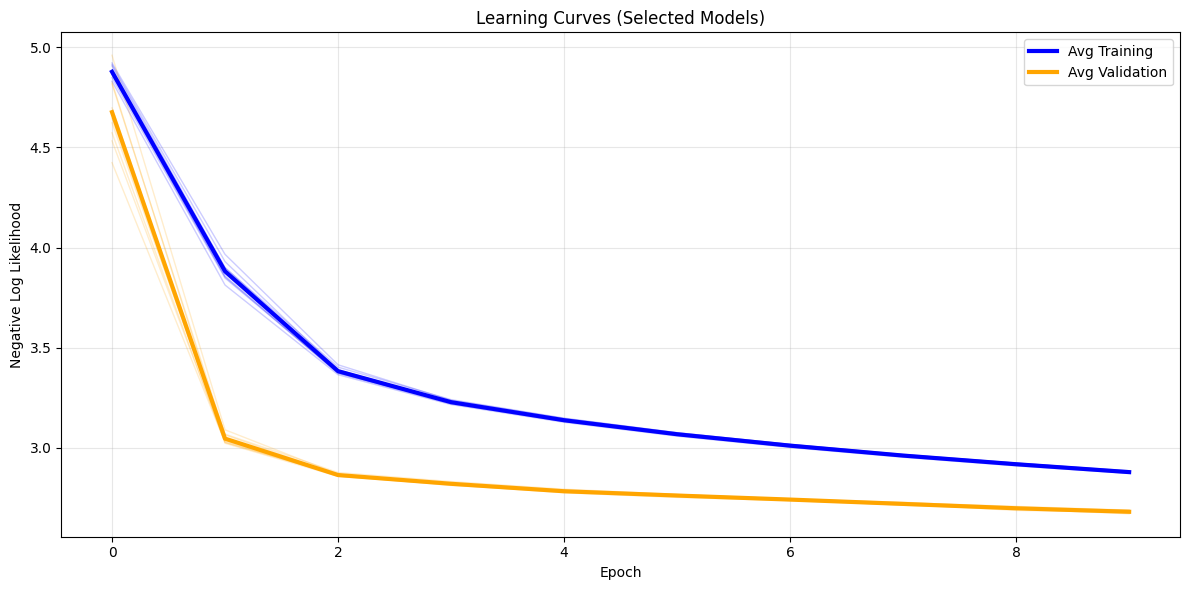

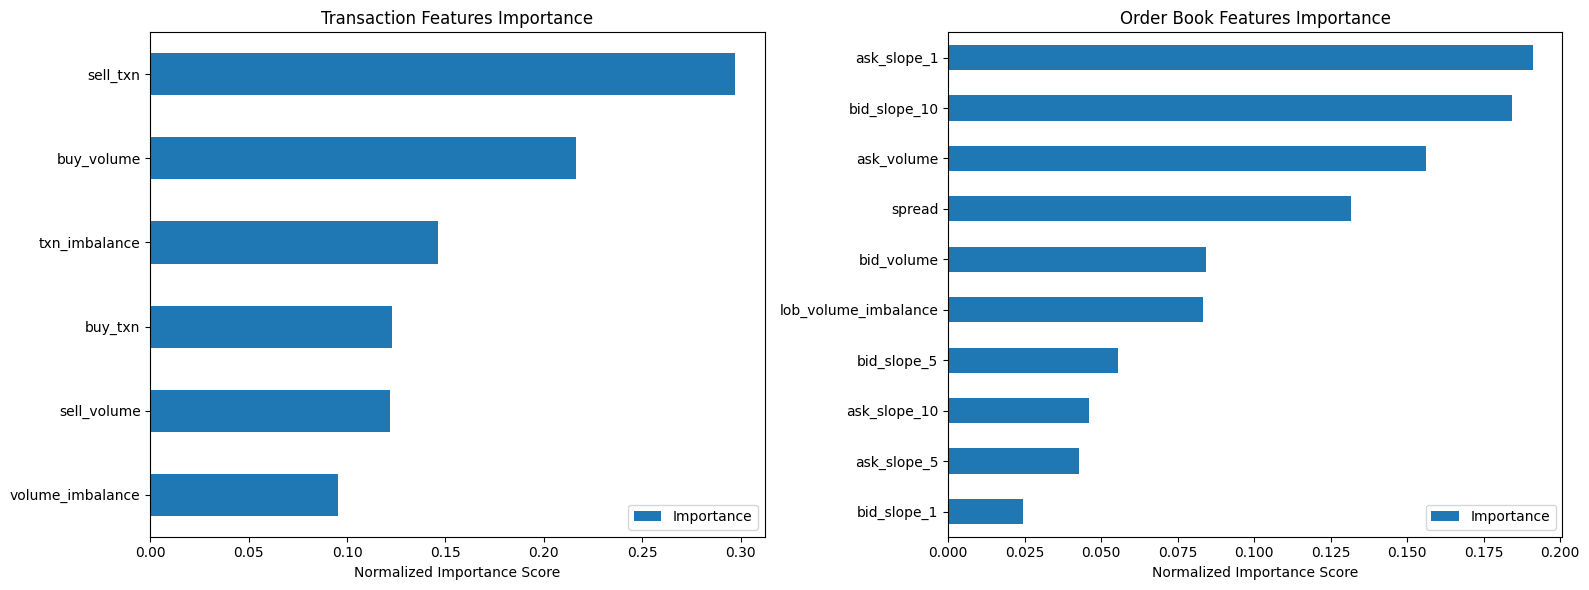

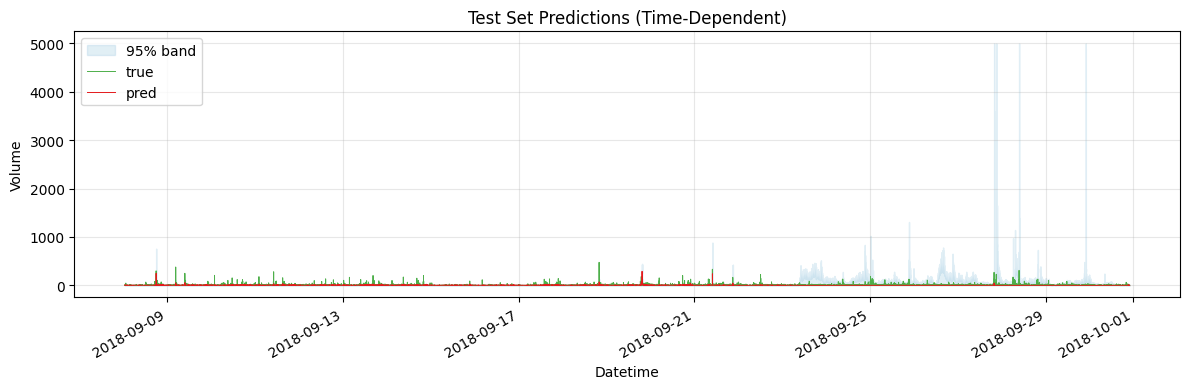

Metric     |      Value
-----------------------
RMSE         |      11.70
MAE           |       4.40
R²             |     0.0143
MAPE (%)  |     184.52
Coverage  |       80.0 %
IW             |      47.22
NNLL         |     4.9536


(array([1.61345043e-03, 5.79489520e-01, 1.00035343e-03, ...,
        1.52989072e+00, 9.35145751e-01, 9.83765599e-01]),
 array([6.7525883 , 2.89233271, 2.63466143, ..., 3.43161665, 3.06480725,
        1.99919517]))

In [4]:


freq='1min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)

tme = TME_ensemble(df_raw, cfg)
tme.train()

# New visualization methods
tme.plot_learning_curves() 
tme.plot_variable_importance()

# Evaluation
tme.evaluate()

# 5 min

trx Data loaded successfully.
preprocessed lob Data loaded successfully.

Training model 1/10
ep01  train 2.4168  val 3.0530
ep02  train 2.3987  val 2.9716
ep03  train 2.3319  val 2.8502
ep04  train 2.2989  val 2.6946
ep05  train 2.2288  val 2.5223
ep06  train 2.1393  val 2.3663
ep07  train 2.0888  val 2.2615
ep08  train 2.0459  val 2.2139
ep09  train 2.0075  val 2.2029
ep10  train 1.9827  val 2.2078

Training model 2/10
ep01  train 2.4173  val 3.0709
ep02  train 2.4018  val 3.0140
ep03  train 2.3539  val 2.9184
ep04  train 2.3202  val 2.7803
ep05  train 2.2330  val 2.6107
ep06  train 2.1684  val 2.4413
ep07  train 2.1127  val 2.3070
ep08  train 2.0630  val 2.2247
ep09  train 2.0285  val 2.1977
ep10  train 1.9984  val 2.1971

Training model 3/10
ep01  train 2.4353  val 3.0659
ep02  train 2.4040  val 3.0018
ep03  train 2.3420  val 2.9026
ep04  train 2.3047  val 2.7667
ep05  train 2.2478  val 2.6024
ep06  train 2.1744  val 2.4357
ep07  train 2.1201  val 2.2962
ep08  train 2.0703  val 2.2

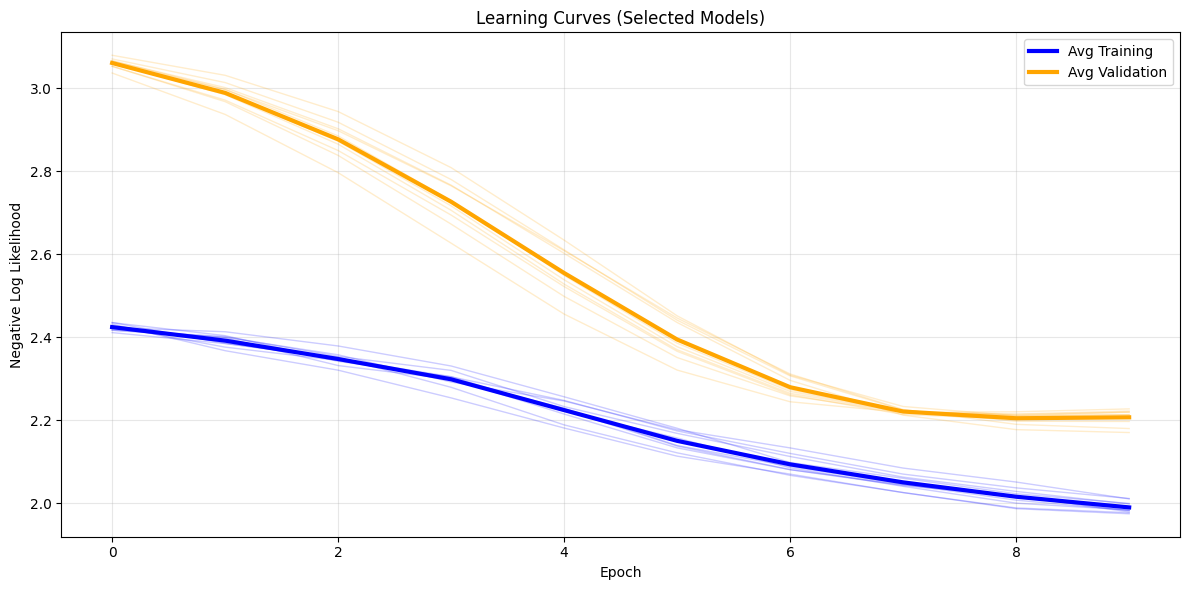

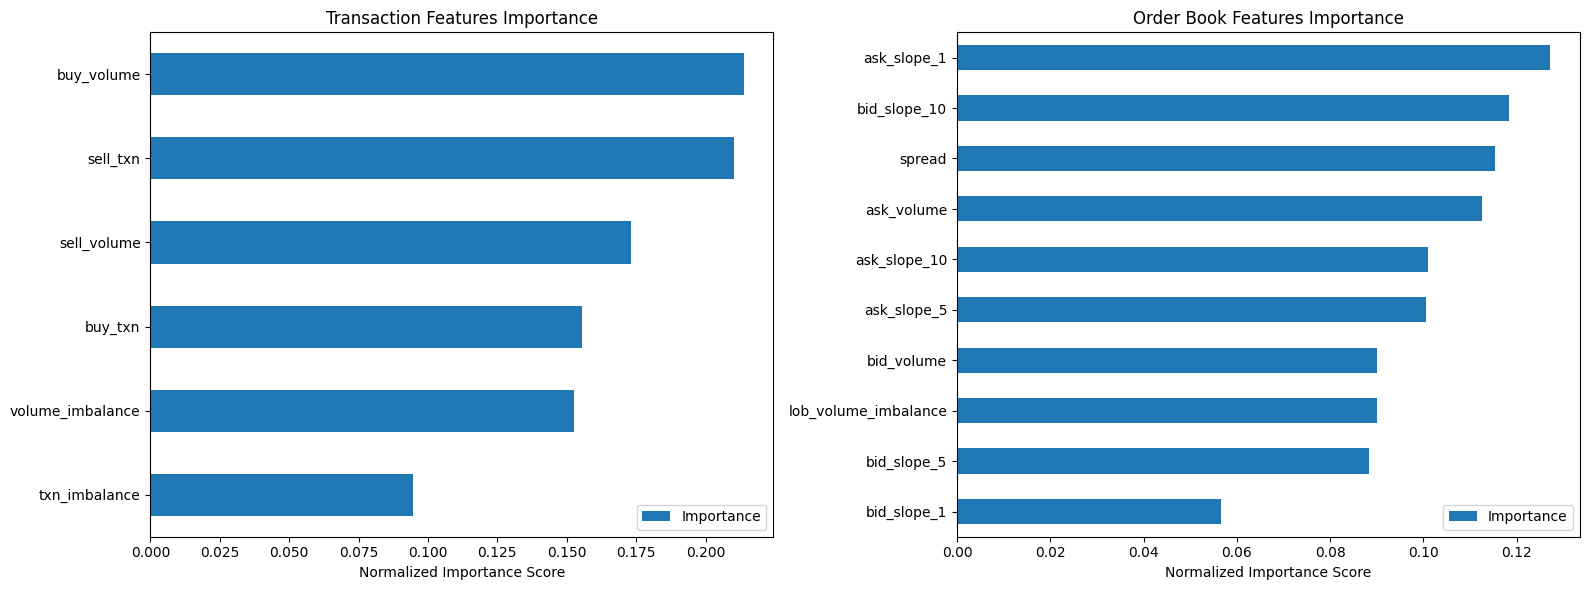

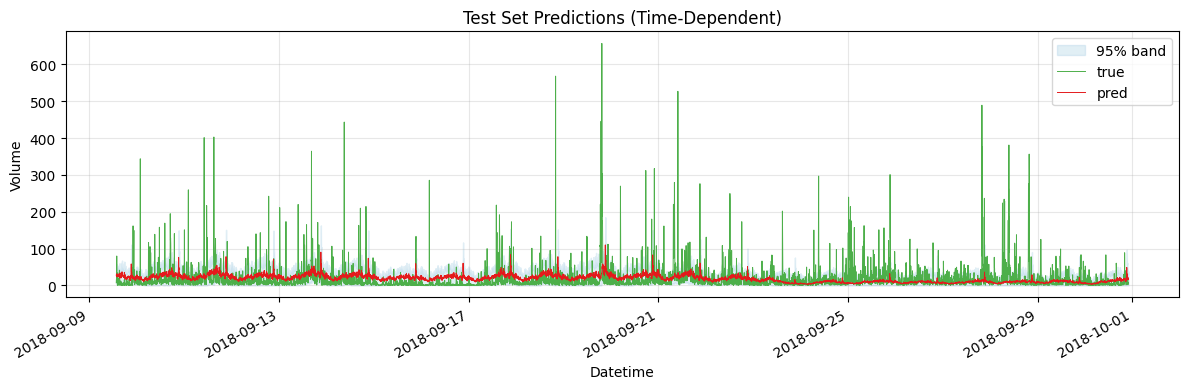

Metric     |      Value
-----------------------
RMSE         |      35.59
MAE           |      18.27
R²             |    -0.0153
MAPE (%)  |     418.46
Coverage  |       79.5 %
IW             |      39.52
NNLL         |     2.7899


(array([ 6.93566508, 15.83377776,  8.48661181, ...,  2.35188444,
         7.64728898,  4.93160051]),
 array([27.80709226, 27.69473341, 23.97916353, ..., 19.21751369,
        15.95796331, 19.207555  ]))

In [5]:


freq='5min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)

tme = TME_ensemble(df_raw, cfg)
tme.train()

# New visualization methods
tme.plot_learning_curves() 
tme.plot_variable_importance()

# Evaluation
tme.evaluate()



# 10 min

trx Data loaded successfully.
preprocessed lob Data loaded successfully.

Training model 1/10
ep01  train 1.9156  val 2.2054
ep02  train 1.9124  val 2.1920
ep03  train 1.8939  val 2.1751
ep04  train 1.8957  val 2.1539
ep05  train 1.8718  val 2.1282
ep06  train 1.8723  val 2.0986
ep07  train 1.8498  val 2.0656
ep08  train 1.8386  val 2.0300
ep09  train 1.8158  val 1.9923
ep10  train 1.8042  val 1.9546

Training model 2/10
ep01  train 1.9189  val 2.2042
ep02  train 1.9088  val 2.1899
ep03  train 1.8928  val 2.1720
ep04  train 1.8815  val 2.1502
ep05  train 1.8676  val 2.1248
ep06  train 1.8562  val 2.0955
ep07  train 1.8416  val 2.0630
ep08  train 1.8291  val 2.0279
ep09  train 1.8126  val 1.9920
ep10  train 1.7982  val 1.9563

Training model 3/10
ep01  train 1.9170  val 2.2078
ep02  train 1.9168  val 2.1968
ep03  train 1.9107  val 2.1824
ep04  train 1.9046  val 2.1643
ep05  train 1.8843  val 2.1421
ep06  train 1.8678  val 2.1156
ep07  train 1.8588  val 2.0852
ep08  train 1.8359  val 2.0

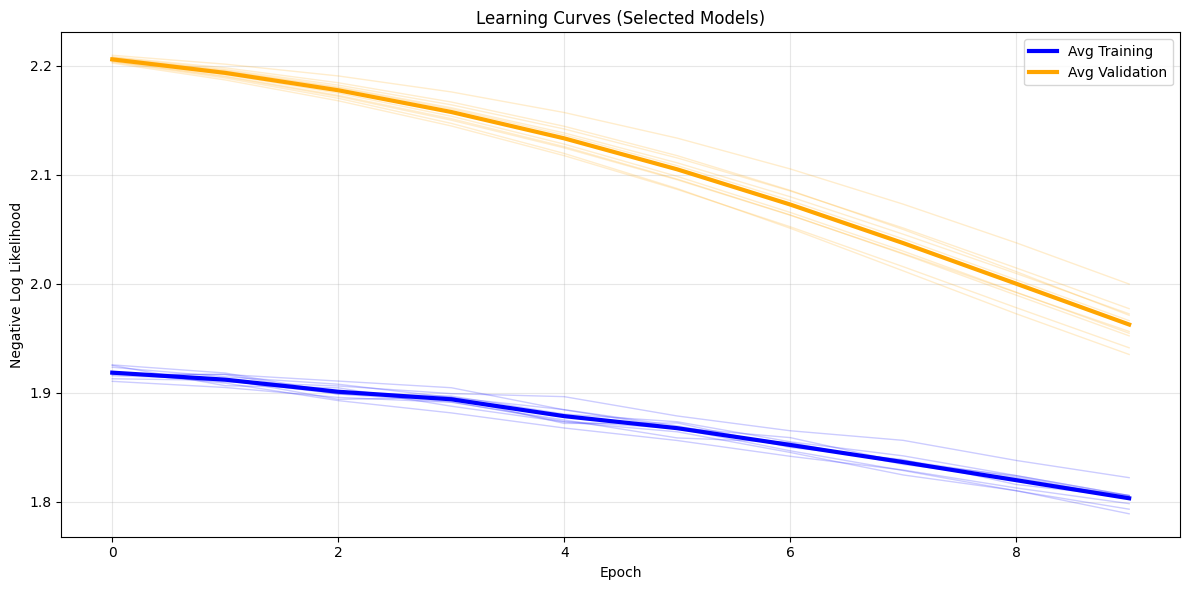

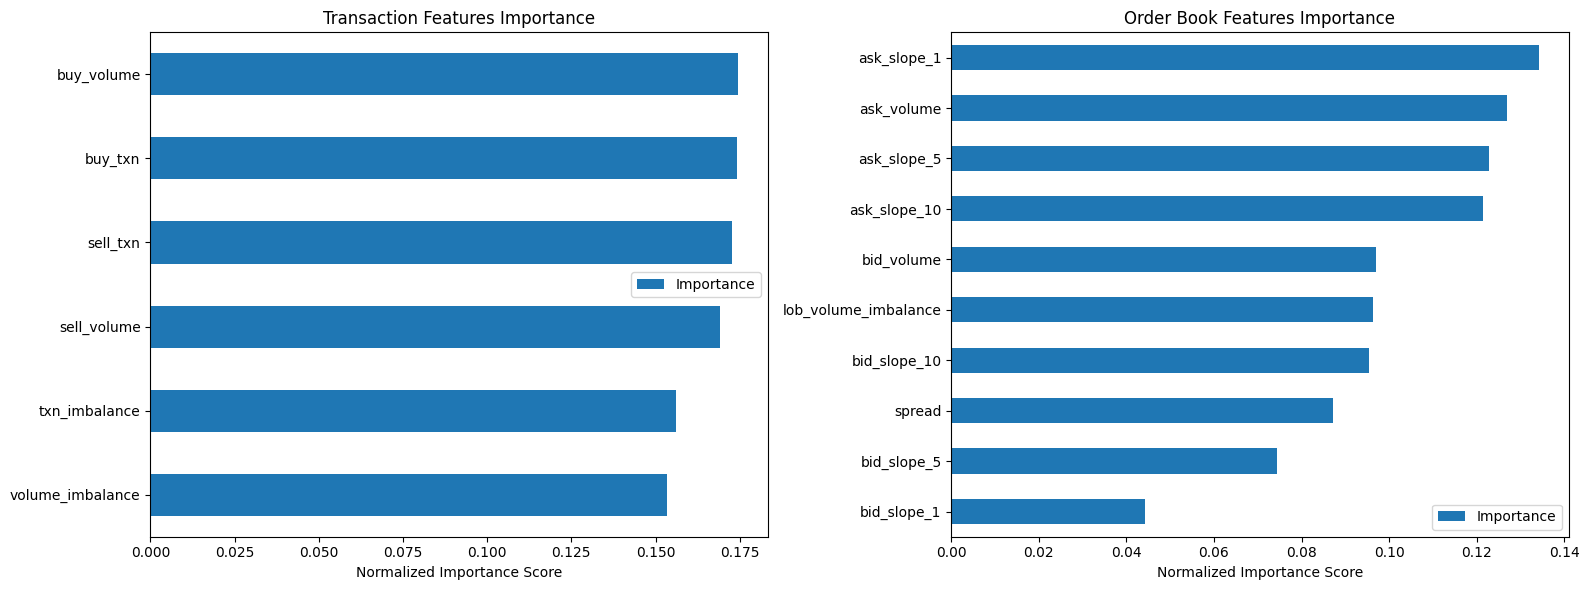

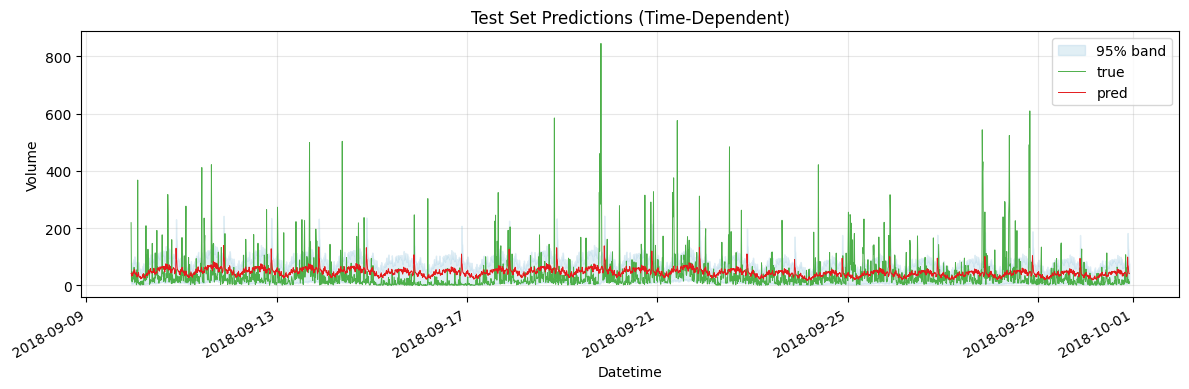

Metric     |      Value
-----------------------
RMSE         |      58.31
MAE           |      35.85
R²             |    -0.0064
MAPE (%)  |     464.61
Coverage  |       69.2 %
IW             |      75.32
NNLL         |     2.4112


(array([219.10196249,  16.76405125,  48.48693492, ...,  19.63661188,
          6.01488119,  12.57888856]),
 array([41.8359997 , 43.49277331, 33.88106051, ..., 50.38679866,
        41.20894592, 41.13863319]))

In [6]:


freq='10min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)

tme = TME_ensemble(df_raw, cfg)
tme.train()

# New visualization methods
tme.plot_learning_curves() 
tme.plot_variable_importance()

# Evaluation
tme.evaluate()


# Cross Validation 

In [2]:
freq='10min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)
df_deses, _ = deses(df_raw)

trx Data loaded successfully.
preprocessed lob Data loaded successfully.


C:\Users\peter\.0\codes\eth\Komplex\Final\models\deseasonalization.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rest['mean_volume'].replace(0, 1e-8, inplace=True)



=== Training Fold 1/2 ===

Training model 1/5
ep01  train 1.9514  val 1.9740
ep02  train 1.9432  val 1.9691
ep03  train 1.9347  val 1.9642

Training model 2/5
ep01  train 1.9511  val 1.9747
ep02  train 1.9440  val 1.9709
ep03  train 1.9358  val 1.9669

Training model 3/5
ep01  train 1.9507  val 1.9751
ep02  train 1.9427  val 1.9725
ep03  train 1.9341  val 1.9692

Training model 4/5
ep01  train 1.9501  val 1.9735
ep02  train 1.9417  val 1.9693
ep03  train 1.9333  val 1.9648

Training model 5/5
ep01  train 1.9515  val 1.9751
ep02  train 1.9445  val 1.9715
ep03  train 1.9378  val 1.9677

=== Training Fold 2/2 ===

Training model 1/5
ep01  train 2.0528  val 2.2330
ep02  train 1.8728  val 2.2030
ep03  train 1.9683  val 2.1635

Training model 2/5
ep01  train 1.9755  val 2.2441
ep02  train 2.0006  val 2.2258
ep03  train 1.9732  val 2.1983

Training model 3/5
ep01  train 2.1690  val 2.2362
ep02  train 1.9416  val 2.2118
ep03  train 1.8389  val 2.1798

Training model 4/5
ep01  train 1.9610  va

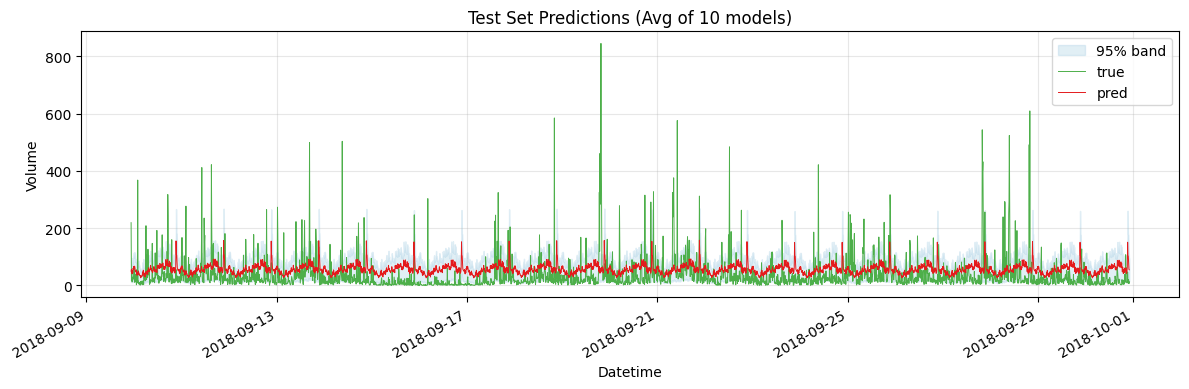

Metric     |      Value
-----------------------
RMSE         |      62.30
MAE           |      43.05
R²             |    -0.1490
MAPE (%)  |     600.64
Coverage  |       50.3 %
IW             |      81.38
NNLL         |     2.9351


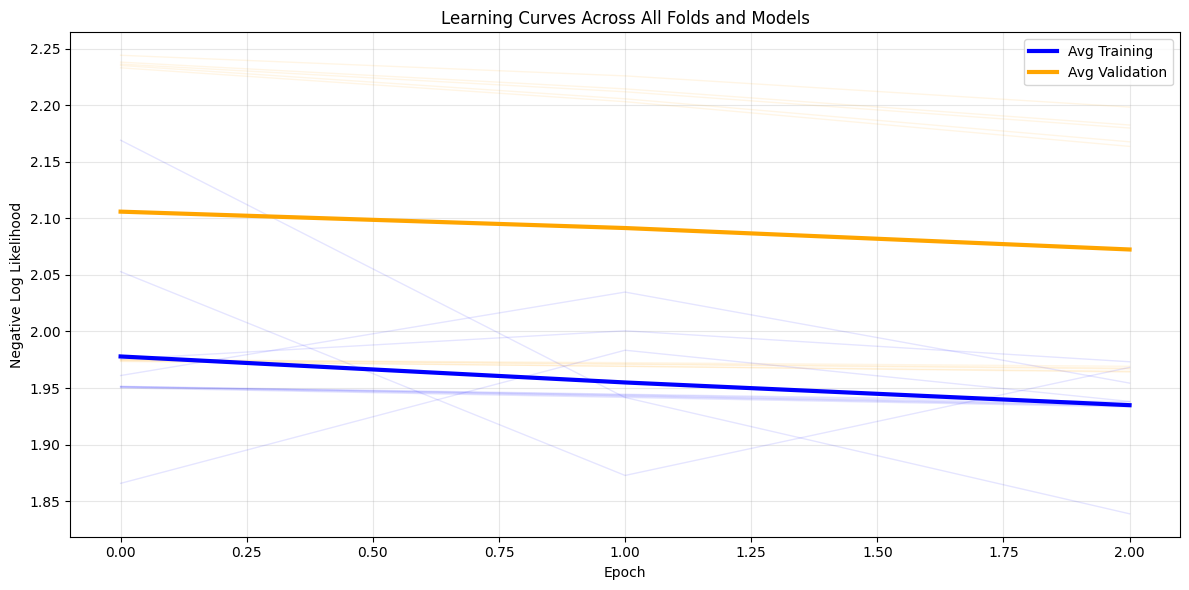

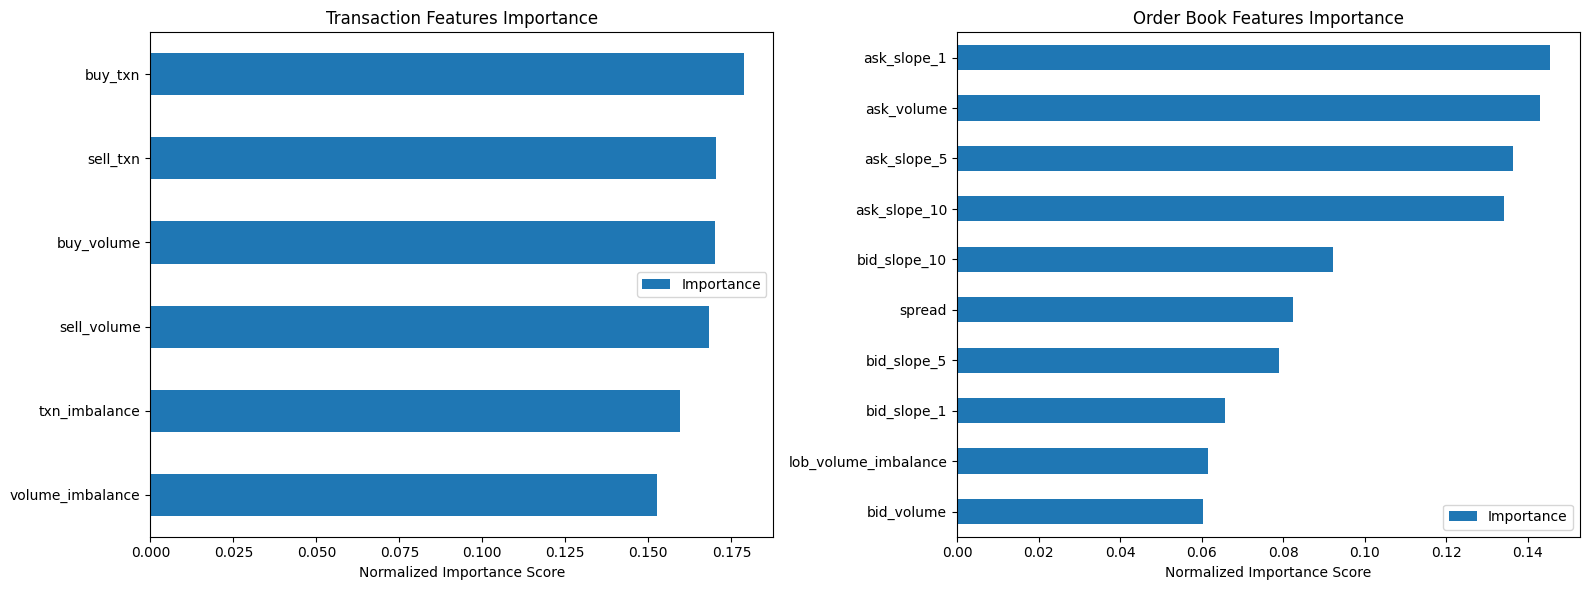

In [6]:
from models.ensemble_cv import TME_ensemble_CV


cfg = {
    "data_split": {
        "n_splits": 2,
        "test_size": 0.2
    },
    "model_params": {
        "horizon": 100,
        "batch_size": 2048,
        "learning_rate": 0.001,
        "epochs": 3,
        "n_models": 5,
        "l2_lambda": 0.01
    }
}

    
# Initialize and train
model = TME_ensemble_CV(df_deses, cfg)
model.train()

# Evaluate and visualize
y_true, y_pred = model.evaluate()
model.plot_learning_curves()
model.plot_variable_importance()

# Save model
#model.save("tme_ensemble_cv.pth")

# Later load and use
# loaded_model = TME_ensemble_CV.load("tme_ensemble_cv.pth", df)